In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("placement.csv")

In [12]:
df.head(10)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


Text(0, 0.5, 'package')

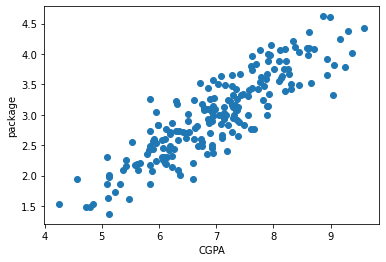

In [13]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("package")

In [14]:
X = df.iloc[:,:1]
y = df.iloc[:,-1]

In [16]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.95,random_state=2)
#random_state=2 means ,pseudo random number fixed, corresponding to that number 2

In [18]:
from sklearn.linear_model import LinearRegression#class linear regression

In [19]:
lr = LinearRegression() #created object lr for further use

In [20]:
#use the attributes of object lr 
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
Name: package, dtype: float64

In [22]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [23]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([3.08320205])

In [24]:
lr.predict(X_test)

array([3.88709148, 3.08320205, 2.36925829, 2.56039284, 1.63282811,
       1.75650341, 2.05444844, 2.92017552, 3.75779458, 2.92579713])

Text(0, 0.5, 'package')

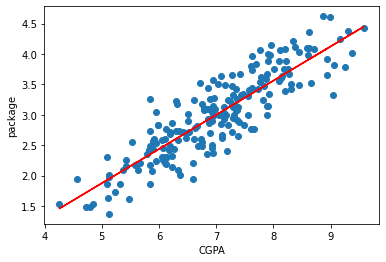

In [25]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("CGPA")
plt.ylabel("package")

In [26]:
m = lr.coef_ # lr object attribute , coef_ gives slope
m

array([0.56216044])

In [27]:
c = lr.intercept_
c

-0.9362451094045725

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [37]:
y_pred = lr.predict(X_test)
y_pred

array([3.88709148, 3.08320205, 2.36925829, 2.56039284, 1.63282811,
       1.75650341, 2.05444844, 2.92017552, 3.75779458, 2.92579713])

In [38]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87])

In [39]:
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 0.2595308359022754


In [40]:
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.0792628142488346


In [41]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.28153652382743277


In [47]:
print("R2_score:",r2_score(y_test,y_pred)) # can explain 90% variance in the output column
r2 = r2_score(y_test,y_pred)

y_test.shape

R2_score: 0.9047075695656515


(10,)

In [44]:
def r2_adjusted(r2,n,k):
    return 1-((1-r2)*(n-1)/(n-1-k))


In [49]:
r2_adjusted(0.9047075695656515,10,1)

0.8927960157613579